In [30]:
import fastbook
fastbook.setup_book()
from fastbook import *
from fastai.vision.widgets import *

#mogrify -strip ./*.jpg


In [31]:
path=Path("data/")

In [32]:
fns = get_image_files(path)
fns

(#498) [Path('data/harsh/image0030.jpg'),Path('data/harsh/image0007.jpg'),Path('data/harsh/harsh10.jpg'),Path('data/harsh/image0076.jpg'),Path('data/harsh/image0028.jpg'),Path('data/harsh/image0048.jpg'),Path('data/harsh/harsh15.jpg'),Path('data/harsh/harsh22.jpg'),Path('data/harsh/harsh14.jpg'),Path('data/harsh/image0063.jpg')...]

In [33]:
failed = verify_images(fns)
failed

(#0) []

In [34]:
failed.map(Path.unlink);

In [35]:
bears = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files, 
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=Resize(460),
    batch_tfms=aug_transforms(size=224, min_scale=0.75))

In [1]:
dls = bears.dataloaders(path)

In [ ]:
dls.valid.show_batch(max_n=16, nrows=4)

In [9]:
#bears.summary(path)

In [10]:
from fastai.callback.fp16 import *
learn = cnn_learner(dls, resnet34, metrics=error_rate).to_fp16()
#learn.fine_tune(6, freeze_epochs=3)

/home/ankur/.local/lib/python3.8/site-packages/fastai/vision/learner.py:265: UserWarning: `cnn_learner` has been renamed to `vision_learner` -- please update your code
  warn("`cnn_learner` has been renamed to `vision_learner` -- please update your code")


In [11]:
from PIL import Image

image = Image.open('demo_image.jpg')

new_image = image.resize((400, 400))

new_image.save('image_400.jpg')

In [12]:
#import re

for img in a:

    txt=str(img)
    pattern=re.compile(r'meko_photo/(.+jpg$)')
    x=pattern.findall(txt)
    if x:
        image = Image.open("data/meko_photo/"+x[0])
        new_image = image.resize((400, 400))
        new_image.save('data/meko/'+x[0]+'.jpg')
        #path_n=Path("data/meko_photo/"+x[0])
        #path_n.unlink()
        print(x[0])

In [13]:
# lr_min,lr_steep = learn.lr_find()

SuggestedLRs(valley=0.0006918309954926372)

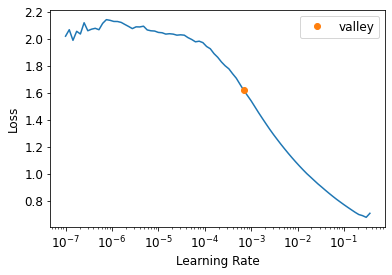

In [14]:
learn.lr_find()

In [2]:
print(f"Minimum/10: {lr_min:.2e}, steepest point: {lr_steep:.2e}")

In [15]:
learn.fit_one_cycle(3, 0.00083)

epoch,train_loss,valid_loss,error_rate,time
0,1.883236,0.901978,0.449438,00:12
1,1.144143,0.199501,0.112360,00:13
2,0.793160,0.082924,0.022472,00:12


In [16]:
learn.unfreeze()

SuggestedLRs(valley=0.00015848931798245758)

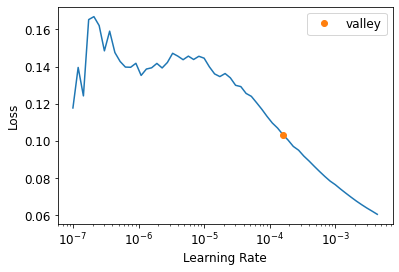

In [17]:
learn.lr_find()

In [ ]:
#learn.fit_one_cycle(6, lr_max=1.2e-4)

In [18]:
#learn = cnn_learner(dls, resnet34, metrics=error_rate).to_fp16()
#learn.fit_one_cycle(3, 6.92e-03)
#learn.unfreeze()
learn.fit_one_cycle(2, lr_max=slice(2e-5,3e-3))

epoch,train_loss,valid_loss,error_rate,time
0,0.111198,0.003821,0.000000,00:13
1,0.065585,0.000239,0.000000,00:14


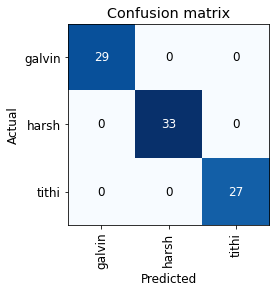

In [19]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

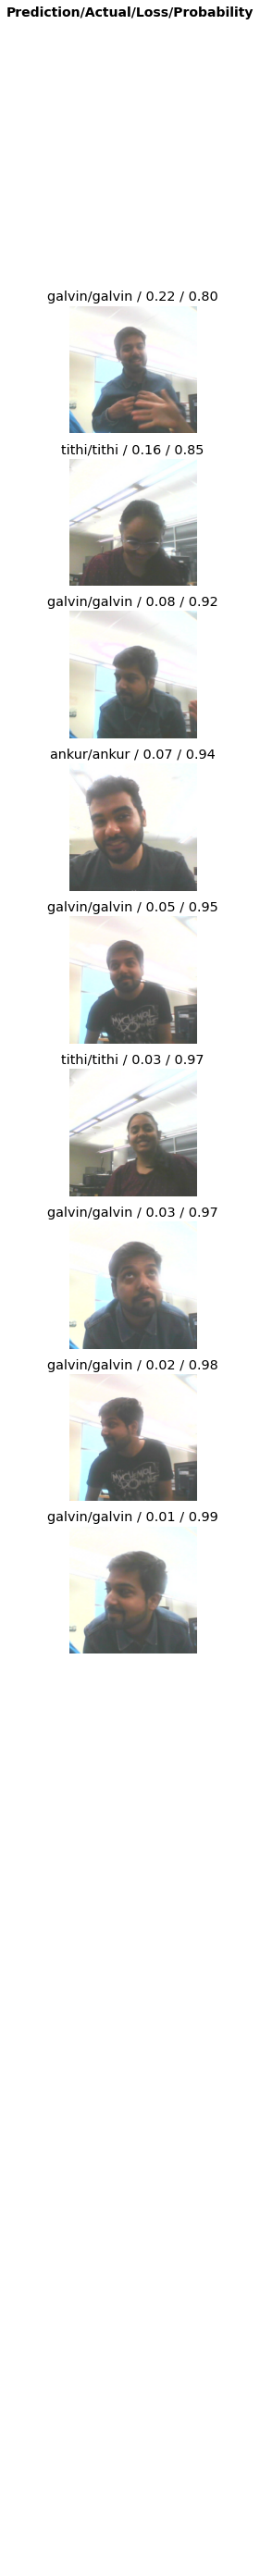

In [21]:
interp.plot_top_losses(15, nrows=15)

In [22]:
cleaner = ImageClassifierCleaner(learn)
cleaner

In [20]:
learn.save("cps_face_trained")


Path('models/cps_face_trained.pth')

In [21]:
learn.export("cps_face_trained")

In [22]:
dls.vocab

['galvin', 'harsh', 'tithi']

In [26]:
test=get_image_files("data/ankur/")

In [35]:
img=PILImage.create(test[20]).to_thumb(224)
img
predsi,_,vals=learn.predict(tensor(img))
for j in torch.where(vals>0.7):
    print(dls.vocab[j],predsi,vals)

['ankur'] ankur TensorBase([9.9954e-01, 4.1969e-05, 3.1224e-04, 1.0088e-04])


In [16]:
fns = get_image_files(path)
fns

(#854) [Path('data/dogs/indian street dogs/00000819.jpg'),Path('data/dogs/indian street dogs/00000146.jpg'),Path('data/dogs/indian street dogs/00000392.jpg'),Path('data/dogs/indian street dogs/00000211.jpg'),Path('data/dogs/indian street dogs/00000238.jpg'),Path('data/dogs/indian street dogs/00000236.jpg'),Path('data/dogs/indian street dogs/00000372.jpg'),Path('data/dogs/indian street dogs/00000204.jpg'),Path('data/dogs/indian street dogs/00000864.jpg'),Path('data/dogs/indian street dogs/00000666.jpg')...]

In [17]:
failed = verify_images(fns)
failed

(#8) [Path('data/dogs/indian street dogs/00000333.jpg'),Path('data/dogs/indian street dogs/00000244.jpg'),Path('data/dogs/indian street dogs/00000697.jpg'),Path('data/dogs/indian street dogs/00000341.jpg'),Path('data/dogs/indian street dogs/00000023.jpg'),Path('data/dogs/indian street dogs/00000362.jpg'),Path('data/dogs/indian street dogs/00000512.jpg'),Path('data/dogs/indian street dogs/00000594.jpeg')]

In [18]:
len(failed)

8

In [19]:
failed.map(Path.unlink);

In [29]:
from os import listdir
from PIL import Image
   
for filename in listdir(str(path)):
  if filename.endswith('.jpg'):
    try:
      img = Image.open('./'+filename) # open the image file
      img.verify() # verify that it is, in fact an image
    except (IOError, SyntaxError) as e:
      print('Bad file:', filename) 

Bad file: 00000819.jpg
Bad file: 00000146.jpg
Bad file: 00000392.jpg
Bad file: 00000211.jpg
Bad file: 00000238.jpg
Bad file: 00000236.jpg
Bad file: 00000372.jpg
Bad file: 00000204.jpg
Bad file: 00000864.jpg
Bad file: 00000666.jpg
Bad file: 00000202.jpg
Bad file: 00000738.jpg
Bad file: 00000106.jpg
Bad file: 00000181.jpg
Bad file: 00000127.jpg
Bad file: 00000680.jpg
Bad file: 00000101.jpg
Bad file: 00000805.jpg
Bad file: 00000760.jpg
Bad file: 00000815.jpg
Bad file: 00000027.jpg
Bad file: 00000635.jpg
Bad file: 00000133.jpg
Bad file: 00000845.jpg
Bad file: 00000425.jpg
Bad file: 00000268.jpg
Bad file: 00000844.jpg
Bad file: 00000063.jpg
Bad file: 00000742.jpg
Bad file: 00000857.jpg
Bad file: 00000116.jpg
Bad file: 00000410.jpg
Bad file: 00000483.jpg
Bad file: 00000562.jpg
Bad file: 00000399.jpg
Bad file: 00000541.jpg
Bad file: 00000266.jpg
Bad file: 00000397.jpg
Bad file: 00000201.jpg
Bad file: 00000550.jpg
Bad file: 00000501.jpg
Bad file: 00000521.jpg
Bad file: 00000601.jpg
Bad file: 0

In [31]:
path=Path("data/dogs")

In [28]:
str(path)

'data/dogs/indian street dogs'

In [24]:
path.ls()

(#1) [Path('data/dogs/indian street dogs')]

In [32]:
__author__ = 'gerry'
#verify if an image is corrupt or not
#help from https://stackoverflow.com/questions/3964681/find-all-files-in-a-directory-with-extension-txt-in-python

img_dir=str(path/'indian street dogs')

corrupt_img_dir=str(path/'corruptimages')
good_img_dir=str(path/'goodimages')

from PIL import Image
import os,time


def verify_image(img_file):
     #test image
     try:
        v_image = Image.open(img_file)
        v_image.verify()
        return True;
        #is valid
        #print("valid file: "+img_file)
     except OSError:
        return False;


#main script
for root, dirs, files in os.walk(img_dir):
    for file in files:
        if file.endswith(".jpg"):
             currentFile=os.path.join(root, file)
             #test image
             if verify_image(currentFile):
                 new_file_name=good_img_dir+time.strftime("%Y%m%d%H%M%S_"+os.path.basename(currentFile))
                 print("good file, moving to dir: "+new_file_name)
                 try:
                     os.rename(currentFile, new_file_name)
                 except WindowsError:
                     print("error moving file")
             else:
                 #Move to corrupt folder
                 #makefilename unique
                 #new_file_name=corrupt_img_dir+time.strftime("%Y%m%d%H%M%S_"+os.path.basename(currentFile))
                 print("corrupt file")
                 #os.rename(currentFile, new_file_name)


good file, moving to dir: data/dogs/goodimages20210510213111_00000819.jpg
good file, moving to dir: data/dogs/goodimages20210510213111_00000146.jpg
good file, moving to dir: data/dogs/goodimages20210510213111_00000392.jpg
good file, moving to dir: data/dogs/goodimages20210510213111_00000211.jpg
good file, moving to dir: data/dogs/goodimages20210510213111_00000238.jpg
good file, moving to dir: data/dogs/goodimages20210510213111_00000236.jpg
good file, moving to dir: data/dogs/goodimages20210510213111_00000372.jpg
good file, moving to dir: data/dogs/goodimages20210510213111_00000204.jpg
good file, moving to dir: data/dogs/goodimages20210510213111_00000864.jpg
good file, moving to dir: data/dogs/goodimages20210510213111_00000666.jpg
good file, moving to dir: data/dogs/goodimages20210510213111_00000202.jpg
good file, moving to dir: data/dogs/goodimages20210510213111_00000738.jpg
good file, moving to dir: data/dogs/goodimages20210510213111_00000106.jpg
good file, moving to dir: data/dogs/go

good file, moving to dir: data/dogs/goodimages20210510213111_00000243.jpg
good file, moving to dir: data/dogs/goodimages20210510213111_00000283.jpg
good file, moving to dir: data/dogs/goodimages20210510213111_00000092.jpg
good file, moving to dir: data/dogs/goodimages20210510213111_00000226.jpg
good file, moving to dir: data/dogs/goodimages20210510213111_00000498.jpg
good file, moving to dir: data/dogs/goodimages20210510213111_00000408.jpg
good file, moving to dir: data/dogs/goodimages20210510213111_00000838.jpg
good file, moving to dir: data/dogs/goodimages20210510213111_00000784.jpg
good file, moving to dir: data/dogs/goodimages20210510213111_00000542.jpg
good file, moving to dir: data/dogs/goodimages20210510213111_00000259.jpg
good file, moving to dir: data/dogs/goodimages20210510213111_00000014.jpg
good file, moving to dir: data/dogs/goodimages20210510213111_00000047.jpg
good file, moving to dir: data/dogs/goodimages20210510213111_00000405.jpg
good file, moving to dir: data/dogs/go

good file, moving to dir: data/dogs/goodimages20210510213111_00000122.jpg
good file, moving to dir: data/dogs/goodimages20210510213111_00000058.jpg
good file, moving to dir: data/dogs/goodimages20210510213111_00000327.jpg
good file, moving to dir: data/dogs/goodimages20210510213111_00000005.jpg
good file, moving to dir: data/dogs/goodimages20210510213111_00000843.jpg
good file, moving to dir: data/dogs/goodimages20210510213111_00000754.jpg
good file, moving to dir: data/dogs/goodimages20210510213111_00000618.jpg
good file, moving to dir: data/dogs/goodimages20210510213111_00000381.jpg
good file, moving to dir: data/dogs/goodimages20210510213111_00000552.jpg
good file, moving to dir: data/dogs/goodimages20210510213111_00000602.jpg
good file, moving to dir: data/dogs/goodimages20210510213111_00000388.jpg
good file, moving to dir: data/dogs/goodimages20210510213111_00000479.jpg
good file, moving to dir: data/dogs/goodimages20210510213111_00000854.jpg
good file, moving to dir: data/dogs/go

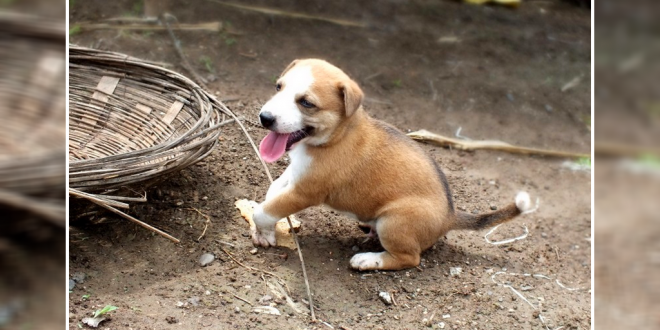

In [45]:
from PIL import Image
 
filename='/home/ankur/Desktop/ml/fastai/esp32cam/data/dogs/indian street dogs/00000001.png' 
def is_valid_image(filename):
    valid = True
    try:
        Image.open(filename).load()
    except OSError:
        valid = False
    return valid
is_valid_image(filename)
im3 = Image.open(filename)
im3

In [48]:
path=Path('/home/ankur/Desktop/ml/fastai/esp32cam/data/dogs/indian_dogs')
dls = ImageDataLoaders.from_folder(path)
learn = cnn_learner(dls, resnet18, pretrained=False,
                    loss_func=F.cross_entropy, metrics=accuracy)
learn.fit_one_cycle(1, 0.1)

TypeError: 'NoneType' object is not iterable

In [47]:
path.ls()

(#894) [Path('/home/ankur/Desktop/ml/fastai/esp32cam/data/dogs/indian street dogs/goodimages20210510213111_00000636.jpg'),Path('/home/ankur/Desktop/ml/fastai/esp32cam/data/dogs/indian street dogs/goodimages20210510213111_00000367.jpg'),Path('/home/ankur/Desktop/ml/fastai/esp32cam/data/dogs/indian street dogs/goodimages20210510213111_00000137.jpg'),Path('/home/ankur/Desktop/ml/fastai/esp32cam/data/dogs/indian street dogs/goodimages20210510213111_00000812.jpg'),Path('/home/ankur/Desktop/ml/fastai/esp32cam/data/dogs/indian street dogs/goodimages20210510213111_00000243.jpg'),Path('/home/ankur/Desktop/ml/fastai/esp32cam/data/dogs/indian street dogs/goodimages20210510213111_00000735.jpg'),Path('/home/ankur/Desktop/ml/fastai/esp32cam/data/dogs/indian street dogs/goodimages20210510213111_00000483.jpg'),Path('/home/ankur/Desktop/ml/fastai/esp32cam/data/dogs/indian street dogs/goodimages20210510213111_00000553.jpg'),Path('/home/ankur/Desktop/ml/fastai/esp32cam/data/dogs/indian street dogs/000001